# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


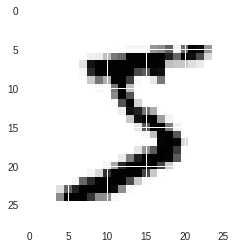

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1), border_mode='same'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, 3, 3, activation='relu'))


model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 5, 5, 10)          330       
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 1, 1, 10)          2510      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=8192, nb_epoch=15, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/15
60000/60000 [==============================] - 9s 154us/step - loss: 3.0920e-04 - acc: 1.0000
Epoch 2/15
60000/60000 [==============================] - 6s 95us/step - loss: 3.0899e-04 - acc: 1.0000
Epoch 3/15
60000/60000 [==============================] - 6s 95us/step - loss: 3.0880e-04 - acc: 1.0000
Epoch 4/15
60000/60000 [==============================] - 6s 95us/step - loss: 3.0860e-04 - acc: 1.0000
Epoch 5/15
60000/60000 [==============================] - 6s 96us/step - loss: 3.0840e-04 - acc: 1.0000
Epoch 6/15
60000/60000 [==============================] - 6s 95us/step - loss: 3.0820e-04 - acc: 1.0000
Epoch 7/15
60000/60000 [==============================] - 6s 95us/step - loss: 3.0801e-04 - acc: 1.0000
Epoch 8/15
60000/60000 [==============================] - 6s 95us/step - loss: 3.0782e-04 - acc: 1.0000
Epoch 9/15
60000/60000 [==============================] - 6s 95us/step - loss: 3.0765e-04 - acc: 1.0000
Epoch 10/15
60000/60000 [==============================] - 6s 9

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.044193381115083114, 0.9919]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[4.2256359e-30 2.1077981e-22 8.5404442e-16 2.6248480e-15 5.2997828e-33
  2.0249753e-25 0.0000000e+00 1.0000000e+00 2.5497051e-23 4.8901287e-16]
 [9.2579030e-18 2.0266444e-25 1.0000000e+00 1.7848475e-25 4.8791329e-32
  0.0000000e+00 1.5060877e-15 2.9974305e-30 1.5481254e-25 4.4913965e-36]
 [6.0047126e-24 1.0000000e+00 1.3858536e-16 1.7553506e-21 3.8052421e-12
  2.4845578e-16 7.4941050e-18 6.7792993e-11 1.3629435e-15 2.8711621e-17]
 [1.0000000e+00 0.0000000e+00 1.0039815e-25 1.0678086e-31 2.3393445e-26
  2.2453701e-26 1.4291172e-20 1.3306091e-30 1.7900559e-26 4.2238437e-24]
 [4.7865414e-36 4.5855964e-27 1.9096006e-27 3.9973740e-33 1.0000000e+00
  1.7292504e-29 1.4767512e-27 5.6279531e-21 2.2998228e-23 4.5363490e-16]
 [3.5499813e-20 1.0000000e+00 4.6510171e-16 6.4682108e-26 3.8926804e-12
  5.3296180e-21 2.6951772e-20 2.0323165e-09 7.6257834e-17 7.3467489e-17]
 [0.0000000e+00 7.0844392e-23 1.5501622e-20 1.5091887e-36 1.0000000e+00
  7.5911748e-20 1.6647700e-27 5.1289807e-22 5.1443566e-13 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_21': <keras.layers.core.Activation at 0x7f028b973780>,
 'conv2d_112': <keras.layers.convolutional.Conv2D at 0x7f0285bd8400>,
 'conv2d_113': <keras.layers.convolutional.Conv2D at 0x7f0285b83fd0>,
 'conv2d_114': <keras.layers.convolutional.Conv2D at 0x7f0285b839b0>,
 'conv2d_115': <keras.layers.convolutional.Conv2D at 0x7f0285b83908>,
 'conv2d_116': <keras.layers.convolutional.Conv2D at 0x7f0285c000f0>,
 'flatten_21': <keras.layers.core.Flatten at 0x7f0285c3fc18>,
 'max_pooling2d_31': <keras.layers.pooling.MaxPooling2D at 0x7f0285d18b70>,
 'max_pooling2d_32': <keras.layers.pooling.MaxPooling2D at 0x7f0285c00588>}

conv2d_112


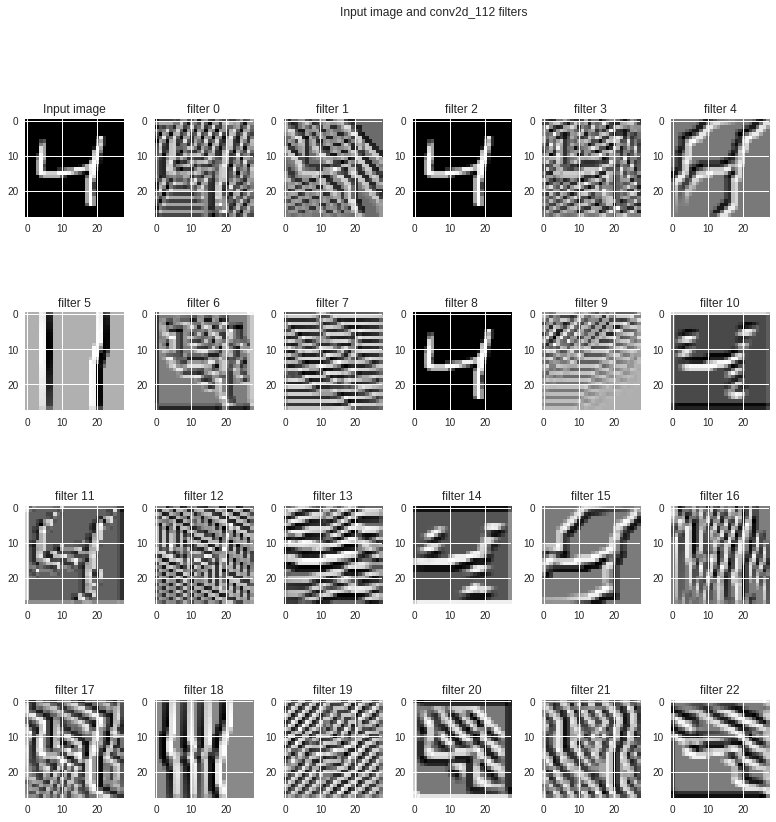

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_112'):
    print(layer_name)
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])
        

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]
        

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()